<a href="https://colab.research.google.com/github/Janani2214/PRODIGY_ML_01/blob/main/TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [8]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
print(train_data.shape)

(1460, 81)


In [10]:
print(train_data.head)

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Util

In [12]:
for column in train_data.columns:
    if train_data[column].dtype == 'object':
        # Fill missing values with the mode for categorical features
        train_data[column] = train_data[column].fillna(train_data[column].mode()[0])
        if column in test_data.columns:
            test_data[column] = test_data[column].fillna(test_data[column].mode()[0])
    else:
        # Fill missing values with the mean for numeric features
        train_data[column] = train_data[column].fillna(train_data[column].mean())
        if column in test_data.columns:
            test_data[column] = test_data[column].fillna(test_data[column].mean())


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)


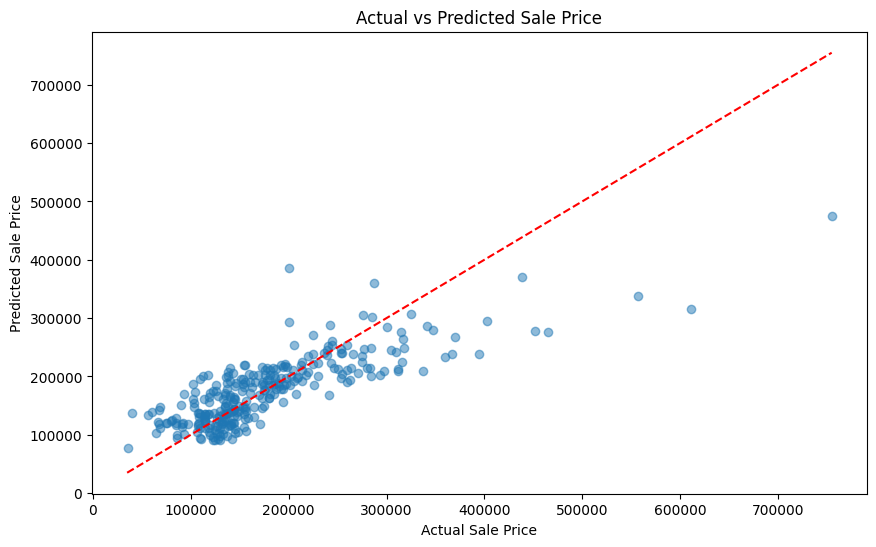

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

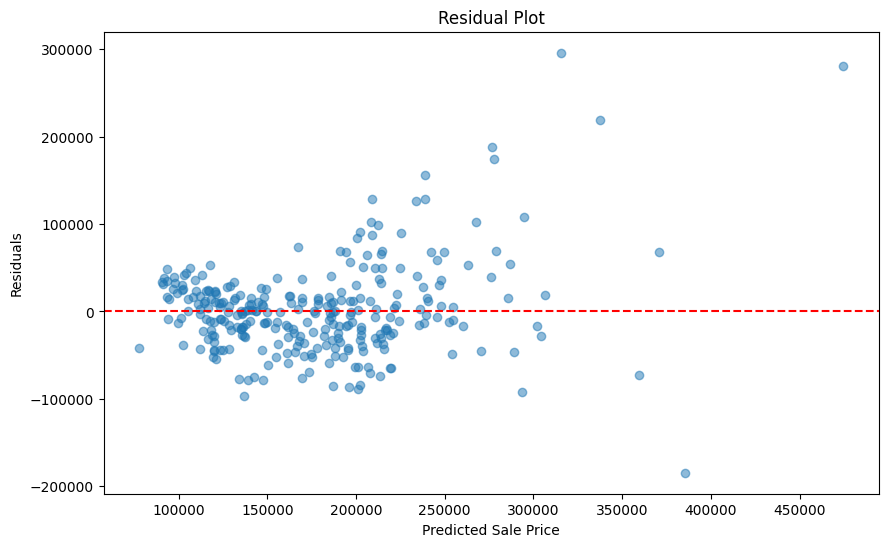

In [16]:
residuals = y_val - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

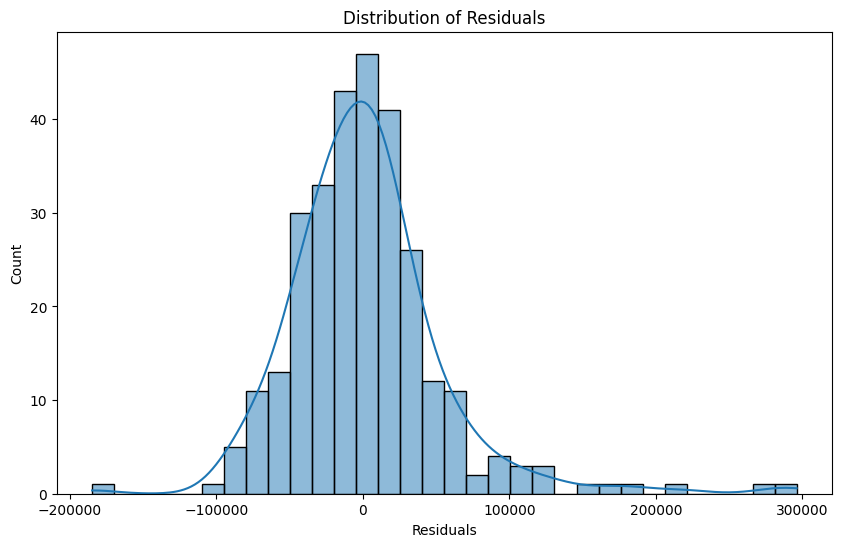

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

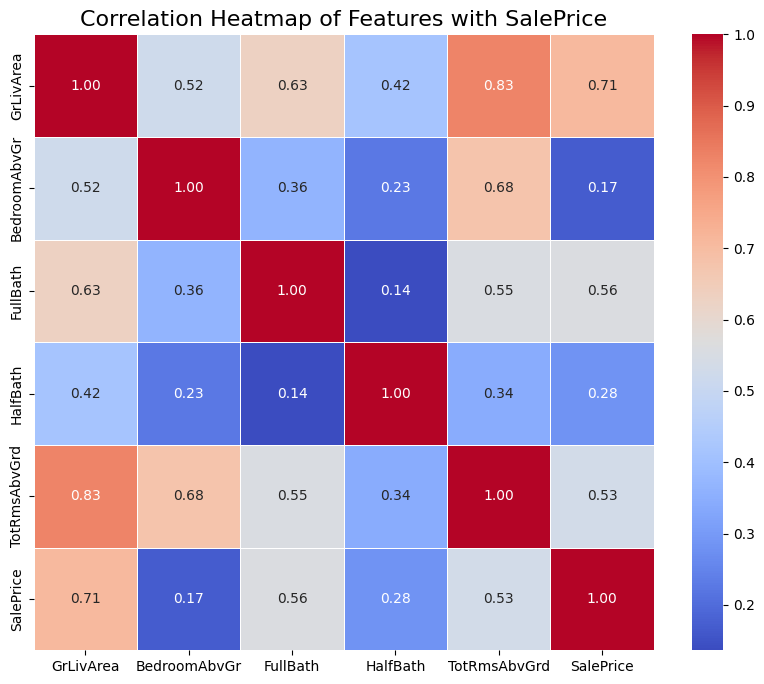

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = train_data[features + ['SalePrice']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Features with SalePrice", fontsize=16)
plt.show()


In [22]:

example = pd.DataFrame({
    'GrLivArea': [2000],
    'BedroomAbvGr': [3],
    'FullBath': [2],
    'HalfBath': [1],
    'TotRmsAbvGrd': [7]
})

example_prediction = model.predict(example)
print("Example Feature Values:")
print(example)
print(f'\nExample Prediction: ${example_prediction[0]:,.2f}')

Example Feature Values:
   GrLivArea  BedroomAbvGr  FullBath  HalfBath  TotRmsAbvGrd
0       2000             3         2         1             7

Example Prediction: $240,896.28


In [23]:
# Prepare the test data and make predictions
X_test = test_data[features]
test_predictions = model.predict(X_test)

In [24]:
print("\nSome Example Predictions:")
for i in range(5):  # Displaying the first 5 predictions
    print(f"ID: {test_data['Id'].iloc[i]}, Predicted SalePrice: ${test_predictions[i]:,.2f}")


Some Example Predictions:
ID: 1461, Predicted SalePrice: $122,343.48
ID: 1462, Predicted SalePrice: $142,899.41
ID: 1463, Predicted SalePrice: $202,352.11
ID: 1464, Predicted SalePrice: $202,645.04
ID: 1465, Predicted SalePrice: $189,910.08


Example Feature Values:
   GrLivArea  BedroomAbvGr  FullBath  HalfBath  TotRmsAbvGrd
0       2000             3         2         1             7

Example Prediction: $240,896.28


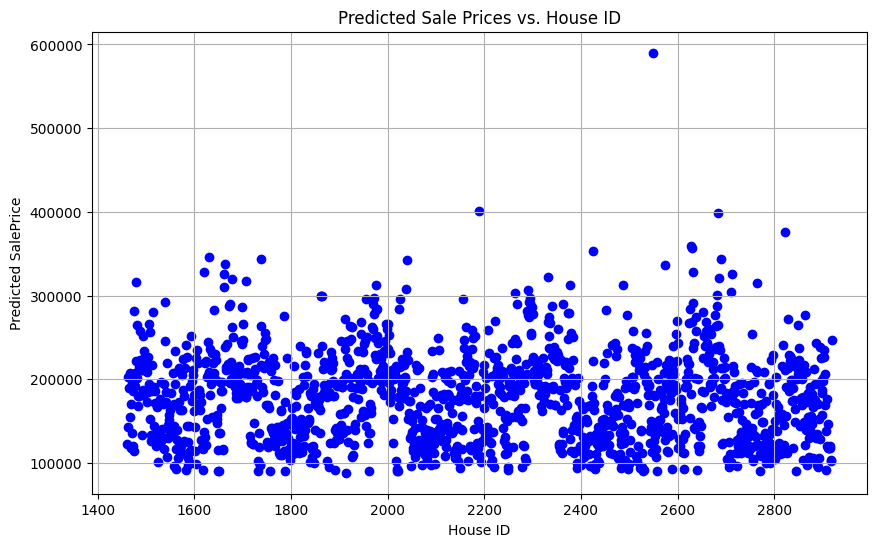

In [25]:
import matplotlib.pyplot as plt

# Example prediction with feature values
example = pd.DataFrame({
    'GrLivArea': [2000],
    'BedroomAbvGr': [3],
    'FullBath': [2],
    'HalfBath': [1],
    'TotRmsAbvGrd': [7]
})

example_prediction = model.predict(example)
print("Example Feature Values:")
print(example)
print(f'\nExample Prediction: ${example_prediction[0]:,.2f}')

# Prepare the test data and make predictions
X_test = test_data[features]
test_predictions = model.predict(X_test)

# Visualization: Scatter plot of predictions
plt.figure(figsize=(10, 6))
plt.scatter(test_data['Id'], test_predictions, color='blue', label='Predicted SalePrice')
plt.title("Predicted Sale Prices vs. House ID")
plt.xlabel("House ID")
plt.ylabel("Predicted SalePrice")
plt.grid(True)
plt.show()
